# 3. Calculate variance of Stokes and anti-Stokes measurements

In [1]:
import os

from dtscalibration import read_xml_dir
from matplotlib import pyplot as plt

In [2]:
try:
    wd = os.path.dirname(os.path.realpath(__file__))
except:
    wd = os.getcwd()

filepath = os.path.join(wd, '..', '..', 'tests', 'data', 'double_ended2')
timezone_netcdf = 'UTC',
timezone_ultima_xml = 'Europe/Amsterdam'
file_ext = '*.xml'

ds = read_xml_dir(filepath,
                  timezone_netcdf=timezone_netcdf,
                  timezone_ultima_xml=timezone_ultima_xml,
                  file_ext=file_ext)
sections = {
    'probe1Temperature': [slice(7.5, 17.), slice(70., 80.)],  # cold bath
    'probe2Temperature': [slice(24., 34.), slice(85., 95.)],  # warm bath
    }

6 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 1693 points along the cable
Dask: Setting up handle for delayed readout. 1 out of 6
Dask: Setting up handle for delayed readout. 6 out of 6
Directly reading time and extra info from xml files. 1 out of 6
Directly reading time and extra info from xml files. 6 out of 6


In [3]:
print(ds.variance_stokes.__doc__)


        Calculates the variance between the measurements and a best fit exponential at each
        reference section. This fits a two-parameter exponential to the stokes measurements. The
        temperature is constant and there are no splices/sharp bends in each reference section.
        Therefore all signal decrease is due to differential attenuation, which is the same for
        each reference section. The scale of the exponential does differ per reference section.

        Assumptions: 1) the temperature is the same along a reference section. 2) no sharp bends
        and splices in the reference sections. 3) Same type of optical cable in each reference
        section.

        Idea from discussion at page 127 in Richter, P. H. (1995). Estimating errors in
        least-squares fitting. For weights used error propagation:
        w^2 = 1/sigma(lny)^2 = y^2/sigma(y)^2 = y^2

        Parameters
        ----------
        use_statsmodels
        suppress_info
        st_label : 

In [9]:
I_var, residuals = ds.variance_stokes(st_label='ST', 
                                      sections=sections, 
                                      use_statsmodels=False, 
                                      debug_high_stokes_variance=False)
print("The variance of the Stokes signal along the reference sections "
      "is approximately {}".format(I_var))

The variance of the Stokes signal along the reference sections is approximately 40.15998656786004


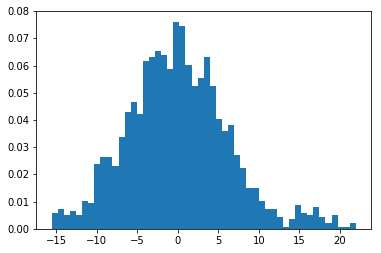

In [10]:
plt.hist(residuals, bins=50, density=True);

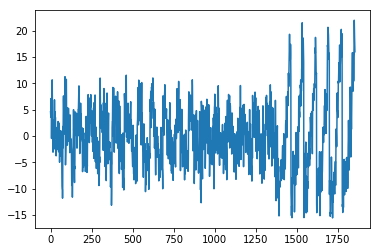

In [11]:
plt.plot(residuals)  # not precisely randoms

In [ ]:
import numpy as np

In [ ]:
np.tile([0., -1.], 4
       )

In [7]:
residuals

array([ 4.59044081,  3.87842694,  3.52629979, ..., 18.65920864,
       17.3673991 , 15.97524777])